# Project Name:

Mall Customers Segmentation Using K-Means Clustering

# Project Summary

This project focuses on analyzing the Mall Customers dataset and segmenting customers based on Annual Income and Spending Score using K-Means clustering.
The goal is to identify different customer groups so that businesses can create targeted marketing strategies.


# GitHub Link

# Problem Statement:

Malls need to understand customer behavior to design targeted marketing campaigns. The dataset provides information about customers’ Age, Gender, Annual Income, and Spending Score. The problem is to segment the customers into distinct groups to:

Identify high-value customers.

Understand low-spending customer patterns.

Assist in promotional strategies.

# Install & setup

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    roc_auc_score
)

In [4]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# What Did You Know About the Dataset?

The dataset contains 200 customer records with 5 attributes:

CustomerID – Unique ID for each customer.

Gender – Male or Female.

Age – Age of the customer.

Annual Income (k$) – Annual income in thousands.

Spending Score (1-100) – Mall assigned score based on spending habits.

The dataset is clean, with no missing values, and is small enough for simple clustering.

In [7]:
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


# Data Visualization & Charts:

Gender Distribution (Countplot)

Why: To understand male/female ratio in customers.

Insight: Slightly more females than males visit the mall.

Age Distribution (Histogram)

Why: To observe which age group visits the mall most.

Insight: Majority of customers are between 30-40 years.

Annual Income vs Spending Score (Scatter Plot)

Why: To see correlation between income and spending habits.

Insight: High-income customers are not necessarily high spenders.

Correlation Heatmap

Why: To see relationships between numeric variables.

Insight: Annual Income and Spending Score have low correlation, confirming clustering is needed.

Cluster Visualization (K-Means)

Why: To visualize customer segments after clustering.

Insight: We identified 5 clusters:

Cluster 0: High income, low spending (“Careful spenders”)

Cluster 1: Low income, high spending (“Target young spenders”)

Cluster 2: Medium income & spending (“Average customers”)

Cluster 3: High income, high spending (“Premium customers”)

Cluster 4: Low income, low spending (“Budget-conscious”)

/tmp/ipython-input-3422956027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, palette="Set2")


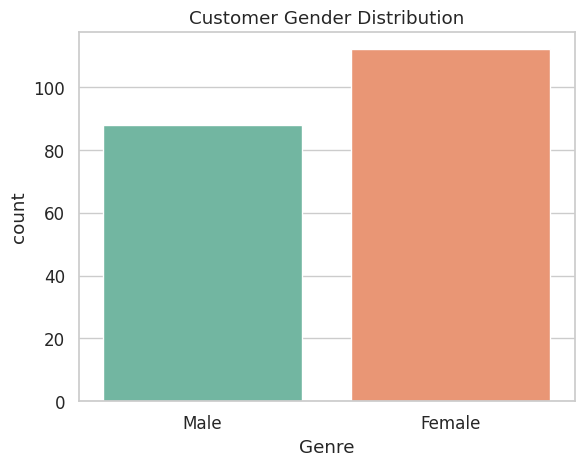

In [14]:
# Distribution of Genre (Male/Female)
sns.countplot(x="Genre", data=df, palette="Set2")
plt.title("Customer Gender Distribution")
plt.show()

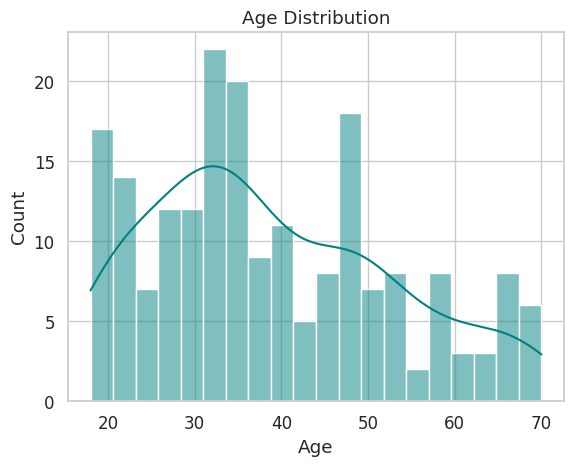

In [15]:
# Age distribution
sns.histplot(df["Age"], kde=True, bins=20, color="teal")
plt.title("Age Distribution")
plt.show()

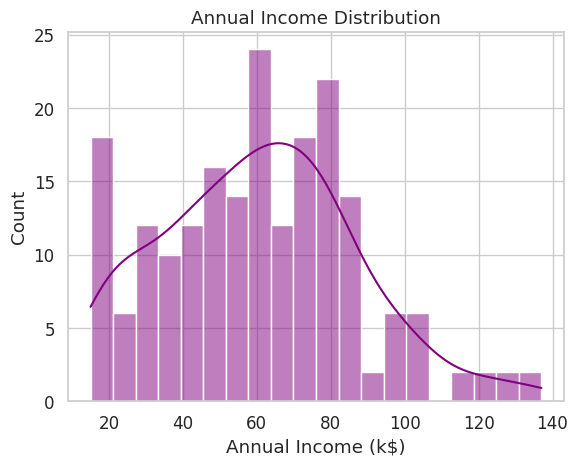

In [16]:
# Annual Income distribution
sns.histplot(df["Annual Income (k$)"], kde=True, bins=20, color="purple")
plt.title("Annual Income Distribution")
plt.show()

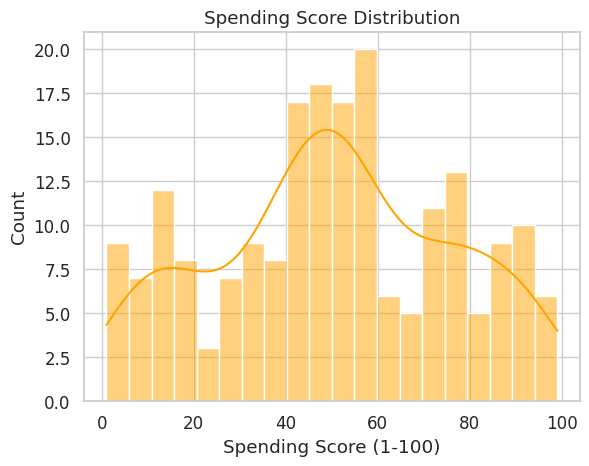

In [17]:
# Spending Score distribution
sns.histplot(df["Spending Score (1-100)"], kde=True, bins=20, color="orange")
plt.title("Spending Score Distribution")
plt.show()

# Feature Selection

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
inertia = []
silhouette = []

In [29]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Method — Determining Optimal Clusters

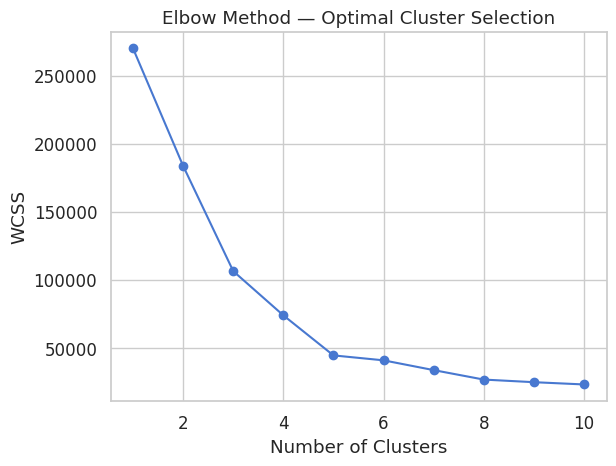

In [19]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method — Optimal Cluster Selection")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


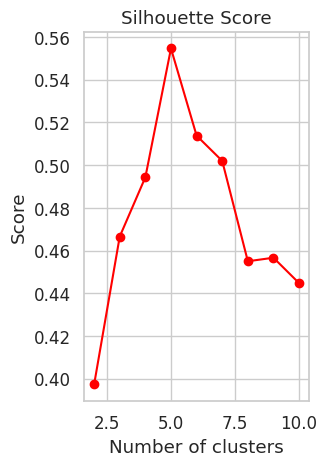

In [31]:
plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette, marker='o', color='red')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.show()

# Apply K-Means Clustering

In [32]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the Clusters

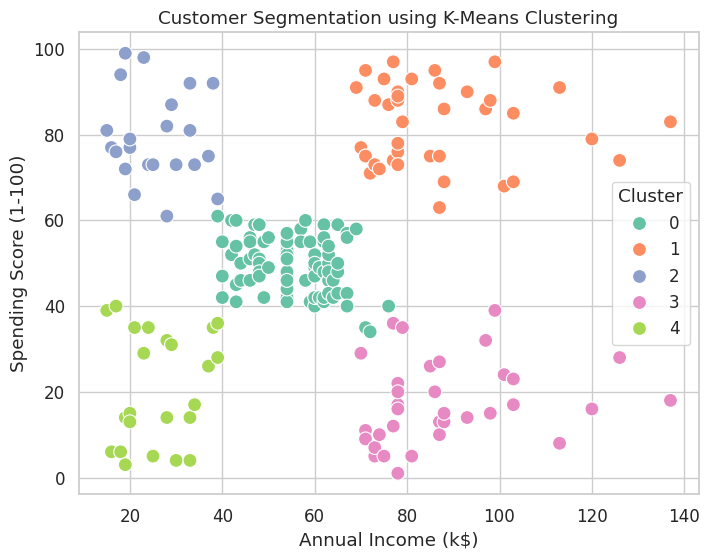

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=100
)
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()


# Cluster Analysis

In [23]:
print("Cluster centroid summaries:\n")
print(df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())


Cluster centroid summaries:

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# Insights:

High-income customers do not always spend more; some are careful with spending.

Young adults tend to have a higher spending score than older adults with similar income.

The mall can target marketing campaigns differently for each cluster:

Premium customers: Exclusive offers

Budget-conscious: Discounts

Young high spenders: Loyalty programs

# Positive or Negative Growth:

Positive Growth: Identifying high-value customers (Cluster 3) helps improve revenue through targeted promotions.

Negative Growth: Low-spending customers (Cluster 0 & 4) may reduce revenue if not targeted efficiently.